## Import Package

In [1]:
import os
import json
import numpy as np
import tensorflow as tf
import tensorflow.keras as keras
import matplotlib.pyplot as plt

## Load Dataset

In [2]:
training_set_base_path = "../input/cat-and-dog/training_set/training_set/"
validation_set_base_path = "../input/cat-and-dog/test_set/test_set/"

training_cat_path = training_set_base_path + "cats"
training_dog_path = training_set_base_path + "dogs"
validation_cat_path = validation_set_base_path + "cats"
validation_dog_path = validation_set_base_path + "dogs"

In [3]:
print("Number of training images: ", len(os.listdir(training_cat_path)) + len(os.listdir(training_dog_path)))
print("Number of validation images: ", len(os.listdir(validation_cat_path)) + len(os.listdir(validation_dog_path)))

Number of training images:  8007
Number of validation images:  2025


## Create ImageDataGenerator for Training without Augmentation

In [4]:
training_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

In [5]:
training_generator = training_gen.flow_from_directory(directory=training_set_base_path,
                                                      target_size=(400, 400),
                                                      class_mode="categorical",
                                                      batch_size=32)

Found 8005 images belonging to 2 classes.


## Create ImageDataGenerator for Training with Augmentation

In [6]:
training_gen_aug = keras.preprocessing.image.ImageDataGenerator(rescale=1/255,
                                                                rotation_range=90,
                                                                width_shift_range=0.2,
                                                                height_shift_range=0.2,
                                                                shear_range=0.2,
                                                                zoom_range=0.2,
                                                                fill_mode="nearest",
                                                                horizontal_flip=True)

In [7]:
training_generator_aug = training_gen_aug.flow_from_directory(directory=training_set_base_path,
                                                      target_size=(400, 400),
                                                      class_mode="categorical",
                                                      batch_size=32)

Found 8005 images belonging to 2 classes.


## Create ImageDataGenerator for Testing

In [8]:
validation_gen = keras.preprocessing.image.ImageDataGenerator(rescale=1/255)

In [9]:
validation_generator = validation_gen.flow_from_directory(directory=validation_set_base_path,
                                                          target_size=(400, 400),
                                                          class_mode="categorical",
                                                          batch_size=32)

Found 2023 images belonging to 2 classes.


## Define Model

### Architecture

In [10]:
inputs = keras.layers.Input(shape=(400, 400, 3))
x = keras.layers.Conv2D(filters=16, kernel_size=(3, 3), strides=1, padding="same", activation=tf.nn.relu)(inputs)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=32, kernel_size=(3, 3), strides=1, padding="same", activation=tf.nn.relu)(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same", activation=tf.nn.relu)(x)
x = keras.layers.Conv2D(filters=64, kernel_size=(3, 3), strides=1, padding="same", activation=tf.nn.relu)(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=128, kernel_size=(3, 3), strides=1, padding="same", activation=tf.nn.relu)(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=256, kernel_size=(3, 3), strides=1, padding="same", activation=tf.nn.relu)(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Conv2D(filters=512, kernel_size=(3, 3), strides=1, padding="same", activation=tf.nn.relu)(x)
x = keras.layers.MaxPooling2D(pool_size=2)(x)
x = keras.layers.Flatten()(x)
x = keras.layers.Dense(units=128, activation=tf.nn.relu)(x)
x = keras.layers.Dense(units=64, activation=tf.nn.relu)(x)
x = keras.layers.Dense(units=32, activation=tf.nn.relu)(x)
x = keras.layers.Dense(units=16, activation=tf.nn.relu)(x)
outputs = keras.layers.Dense(units=2, activation=tf.nn.softmax)(x)

In [11]:
model = keras.models.Model(inputs=inputs, outputs=outputs)

In [12]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 400, 400, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 400, 400, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 200, 200, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 200, 200, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 100, 100, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 100, 100, 64)      18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 100, 100, 64)     

### Compilation

In [13]:
model.compile(loss="categorical_crossentropy", optimizer=keras.optimizers.Adam(learning_rate=0.0001), metrics=["acc"])

### Callback

In [14]:
pass

## Save Model

In [15]:
model.save_weights("initial_model.h5")

## Train Model with Non-Augmented Data

In [ ]:
history = model.fit(x=training_generator,
          epochs=200,
          steps_per_epoch=64,
          validation_data=validation_generator,
          validation_steps=32)

In [17]:
with open("history.json", "w") as file:
    json.dump(history.history, file)

## Train Model with Augmented Data

In [ ]:
model.load_weights("initial_model.h5")
history_aug = model.fit(x=training_generator_aug,
          epochs=200,
          steps_per_epoch=64,
          validation_data=validation_generator,
          validation_steps=32)

In [19]:
with open("history_aug.json", "w") as file:
    json.dump(history_aug.history, file)

## Compare Two Training Process

In [20]:
with open("history.json", 'r') as file:
    data = file.read()

history = json.loads(data)

In [21]:
with open("history_aug.json", 'r') as file:
    data = file.read()

history_aug = json.loads(data)

In [22]:
training_acc = history["acc"]
training_val_acc = history["val_acc"]
aug_training_acc = history_aug["acc"]
aug_training_val_acc = history_aug["val_acc"]
epochs = list(range(len(training_acc)))

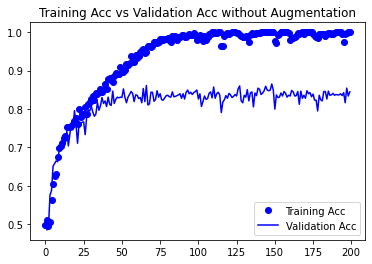

In [23]:
plt.plot(epochs, training_acc, 'bo', label="Training Acc")
plt.plot(epochs, training_val_acc, 'b', label="Validation Acc")
plt.title("Training Acc vs Validation Acc without Augmentation")
plt.legend()
plt.show()

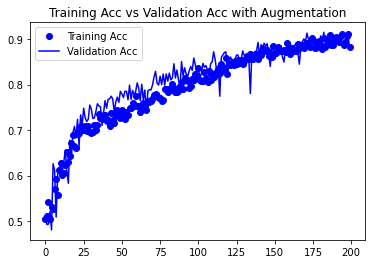

In [24]:
plt.plot(epochs, aug_training_acc, 'bo', label="Training Acc")
plt.plot(epochs, aug_training_val_acc, 'b', label="Validation Acc")
plt.title("Training Acc vs Validation Acc with Augmentation")
plt.legend()
plt.show()